# Imported required packages

In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [2]:
data_train=pd.read_csv("mnist_train.csv")

In [3]:
X_train=data_train.iloc[:,1:]
y_train=data_train["label"]

# Checking data balanced or not

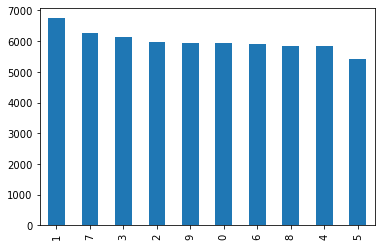

In [4]:
data_train["label"].value_counts().plot.bar()

In [5]:
data_test=pd.read_csv("mnist_test.csv")

In [6]:
X_test=data_test.iloc[:,1:]
y_test=data_test["label"]

In [7]:
X_train=X_train/255
X_test=X_test/255

In [8]:
X_train = tf.reshape(X_train, shape=[-1, 28, 28])
X_test = tf.reshape(X_test, shape=[-1, 28, 28])

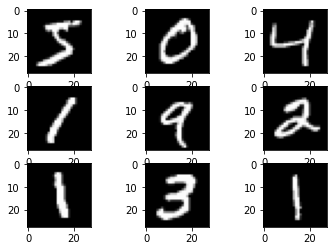

In [9]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(np.array(X_train[i]), cmap=pyplot.get_cmap('gray'))

# show the figure
pyplot.show()

In [10]:
X_train = tf.reshape(X_train, shape=[-1, 28, 28,1])
X_test = tf.reshape(X_test, shape=[-1, 28, 28,1])

In [11]:
y=pd.get_dummies(pd.concat([y_train,y_test]))

In [12]:
y_train=y.iloc[:60000,:]
y_test=y.iloc[60000:,:]

In [13]:
X_train.shape

TensorShape([60000, 28, 28, 1])

# Model development

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [15]:
opt = opt = tf.keras.optimizers.Adam(learning_rate=0.0008,beta_1=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [16]:
history=model.fit(X_train,y_train,epochs=10,batch_size=30,validation_data=(X_test,y_test))

Epoch 1/10
2000/2000 [==============================] - 161s 80ms/step - loss: 0.2363 - accuracy: 0.9275 - val_loss: 0.0438 - val_accuracy: 0.9856
Epoch 2/10
2000/2000 [==============================] - 167s 83ms/step - loss: 0.0817 - accuracy: 0.9760 - val_loss: 0.0421 - val_accuracy: 0.9859
Epoch 3/10
2000/2000 [==============================] - 145s 72ms/step - loss: 0.0599 - accuracy: 0.9823 - val_loss: 0.0235 - val_accuracy: 0.9926
Epoch 4/10
2000/2000 [==============================] - 129s 65ms/step - loss: 0.0490 - accuracy: 0.9851 - val_loss: 0.0238 - val_accuracy: 0.9934
Epoch 5/10
2000/2000 [==============================] - 132s 66ms/step - loss: 0.0408 - accuracy: 0.9880 - val_loss: 0.0288 - val_accuracy: 0.9908
Epoch 6/10
2000/2000 [==============================] - 137s 68ms/step - loss: 0.0374 - accuracy: 0.9891 - val_loss: 0.0234 - val_accuracy: 0.9934
Epoch 7/10
2000/2000 [==============================] - 131s 66ms/step - loss: 0.0305 - accuracy: 0.9909 - val_loss: 0

# ploting loss and accuracy for every epochs

In [17]:
import matplotlib.pyplot as plt

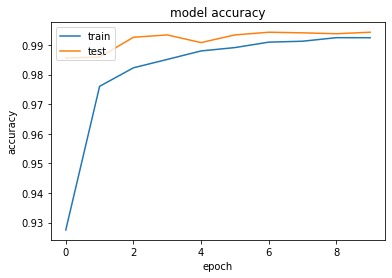

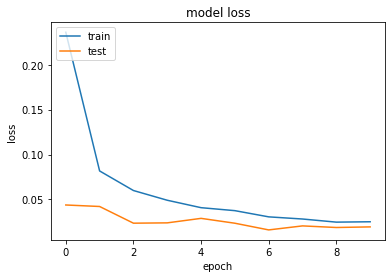

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
y_pred=model.predict(X_test)

In [34]:
y_pred = (y_pred > 0.5)

# Perfomence metrics

In [35]:
from sklearn.metrics import *

## Test accuracy

In [36]:
accuracy_score(y_test,y_pred)

0.9942

In [37]:
confusion_matrix(
    y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

array([[ 977,    0,    0,    0,    0,    0,    1,    1,    1,    0],
       [   2, 1130,    0,    1,    0,    1,    1,    0,    0,    0],
       [   1,    1, 1028,    1,    0,    0,    0,    1,    0,    0],
       [   1,    0,    0, 1008,    0,    1,    0,    0,    0,    0],
       [   0,    0,    0,    0,  980,    0,    0,    0,    0,    2],
       [   0,    0,    0,    7,    0,  884,    1,    0,    0,    0],
       [   3,    1,    0,    0,    1,    1,  952,    0,    0,    0],
       [   1,    4,    3,    0,    0,    0,    0, 1018,    0,    2],
       [   0,    0,    1,    3,    1,    1,    0,    1,  964,    3],
       [   1,    0,    0,    0,    4,    0,    0,    1,    2, 1001]],
      dtype=int64)

## test f1_score

In [38]:
f1_score(y_test, y_pred, pos_label='positive',average='micro')

C:\Users\Ramu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


0.9943988797759552

In [39]:
y_pred=model.predict(X_train)

In [40]:
y_pred = (y_pred > 0.5)

## train accuracy

In [41]:
accuracy_score(y_train,y_pred)

0.9978833333333333

In [42]:
confusion_matrix(
    y_train.values.argmax(axis=1), y_pred.argmax(axis=1))

array([[5920,    0,    0,    0,    0,    0,    1,    0,    2,    0],
       [   2, 6732,    1,    1,    0,    0,    2,    2,    2,    0],
       [   3,    1, 5948,    3,    0,    0,    0,    3,    0,    0],
       [   0,    0,    1, 6126,    0,    2,    0,    1,    0,    1],
       [   1,    2,    0,    0, 5830,    0,    0,    1,    0,    8],
       [   0,    1,    0,    6,    0, 5399,    7,    0,    2,    6],
       [   2,    0,    0,    0,    2,    0, 5914,    0,    0,    0],
       [   3,   11,    4,    0,    3,    0,    0, 6242,    0,    2],
       [   5,    0,    1,    5,    3,    1,    3,    0, 5829,    4],
       [   5,    1,    0,    0,    7,    0,    0,    1,    0, 5935]],
      dtype=int64)

## train f1_score

In [43]:
f1_score(y_train, y_pred, pos_label='positive',average='micro')

C:\Users\Ramu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


0.9980247201686906